# Data Scientists Analysing

in this project I have some dataset about data scientist and I will try to get some interesting informations about them, I will response these three questions : 
<ul>
<li>What is the average salary of deferent kind of data scientists</li>
<li>The best 10 state in USA for data scientists</li>
<li>What are the skills of the data scientists that earn more than 150k $ from their jobs</li>
</ul>

## Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
# matplotlib.rcParams['font.size'] = 14

import warnings
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


## Data exploring and cleaning

In [3]:
data.shape

(742, 42)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

Hopefully we can see that we have any missing values 

In [5]:
data.columns 

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

Now we have to specify the columns that we need in our analyse and drop the other columns 

In [6]:
cols = ['job_title_sim',
        'Job Title',
        # Location of the Company
        'Location',
        # Salary
        'Lower Salary',
        'Upper Salary',
        'Avg Salary(K)',
        # Skills
        'Python','spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit','tensor',
        'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an'   
]

In [7]:
df = data[cols].copy()

In [8]:
df.head()

,job_title_sim,Job Title,Location,Lower Salary,Upper Salary,Avg Salary(K),Python,spark,aws,excel,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,data scientist,Data Scientist,"Albuquerque, NM",53,91,72.0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,data scientist,Healthcare Data Scientist,"Linthicum, MD",63,112,87.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data scientist,Data Scientist,"Clearwater, FL",80,90,85.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,data scientist,Data Scientist,"Richland, WA",56,97,76.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data scientist,Data Scientist,"New York, NY",86,143,114.5,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title_sim  742 non-null    object 
 1   Job Title      742 non-null    object 
 2   Location       742 non-null    object 
 3   Lower Salary   742 non-null    int64  
 4   Upper Salary   742 non-null    int64  
 5   Avg Salary(K)  742 non-null    float64
 6   Python         742 non-null    int64  
 7   spark          742 non-null    int64  
 8   aws            742 non-null    int64  
 9   excel          742 non-null    int64  
 10  sql            742 non-null    int64  
 11  sas            742 non-null    int64  
 12  keras          742 non-null    int64  
 13  pytorch        742 non-null    int64  
 14  scikit         742 non-null    int64  
 15  tensor         742 non-null    int64  
 16  hadoop         742 non-null    int64  
 17  tableau        742 non-null    int64  
 18  bi        

In [10]:
df.describe()

,Lower Salary,Upper Salary,Avg Salary(K),Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,74.754717,128.214286,101.484501,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,30.945892,45.128650,37.482449,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,15.000000,16.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,96.000000,73.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.500000,124.000000,97.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,155.000000,122.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202.000000,306.000000,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


we ended up with this !!

## Data analysing
### 1) The average salary

In [11]:
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
director                            5
data modeler                        5
Name: job_title_sim, dtype: int64

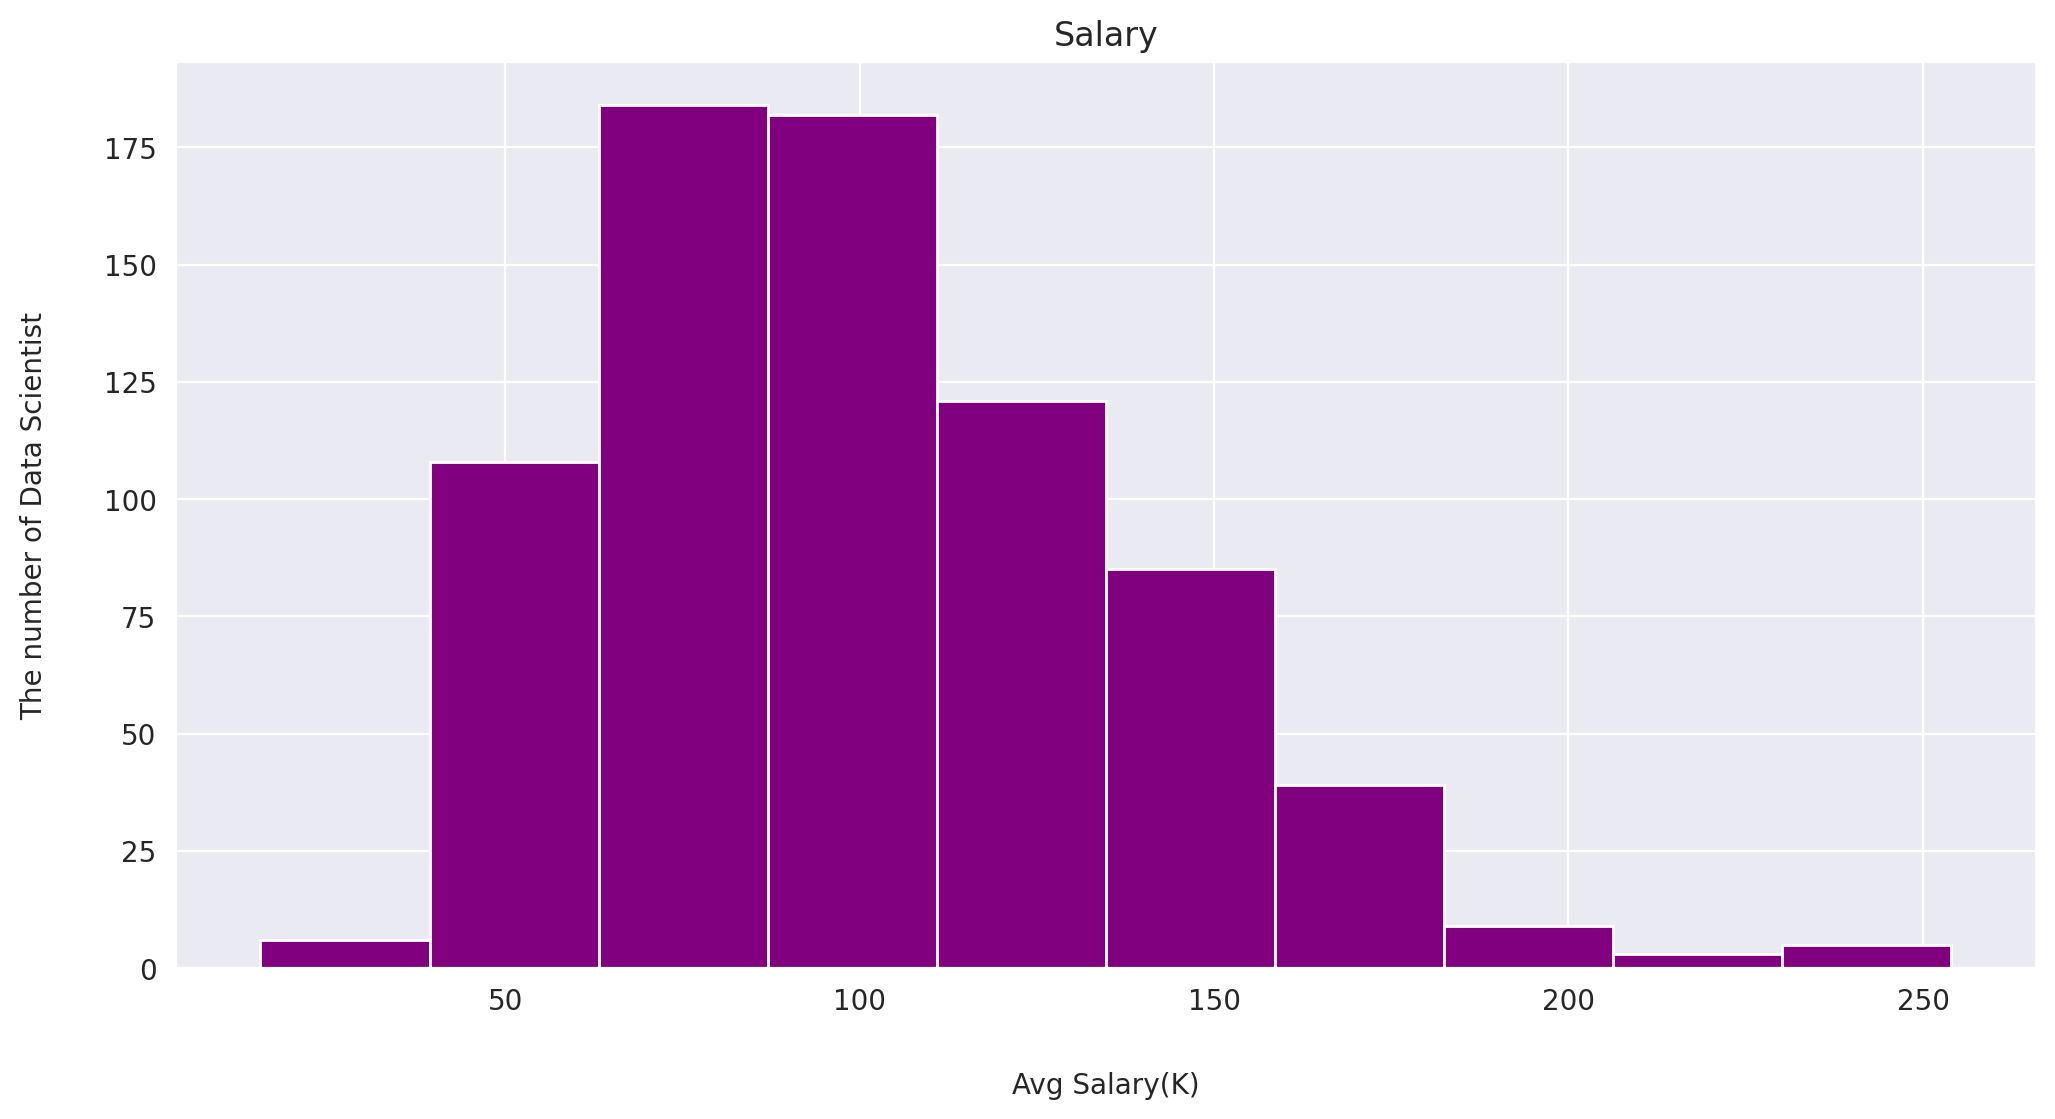

In [12]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Salary')
plt.xlabel('Avg Salary(K)', labelpad=20)
# plt.xticks(rotation=90)
plt.ylabel('The number of Data Scientist', labelpad=20)
plt.hist(df['Avg Salary(K)'], color='purple')
plt.show()

We notice that the avrage salary of most employee who work in the domaine of Data science is around (75k - 100k)  

### 2) The best 10 state for data scientist 

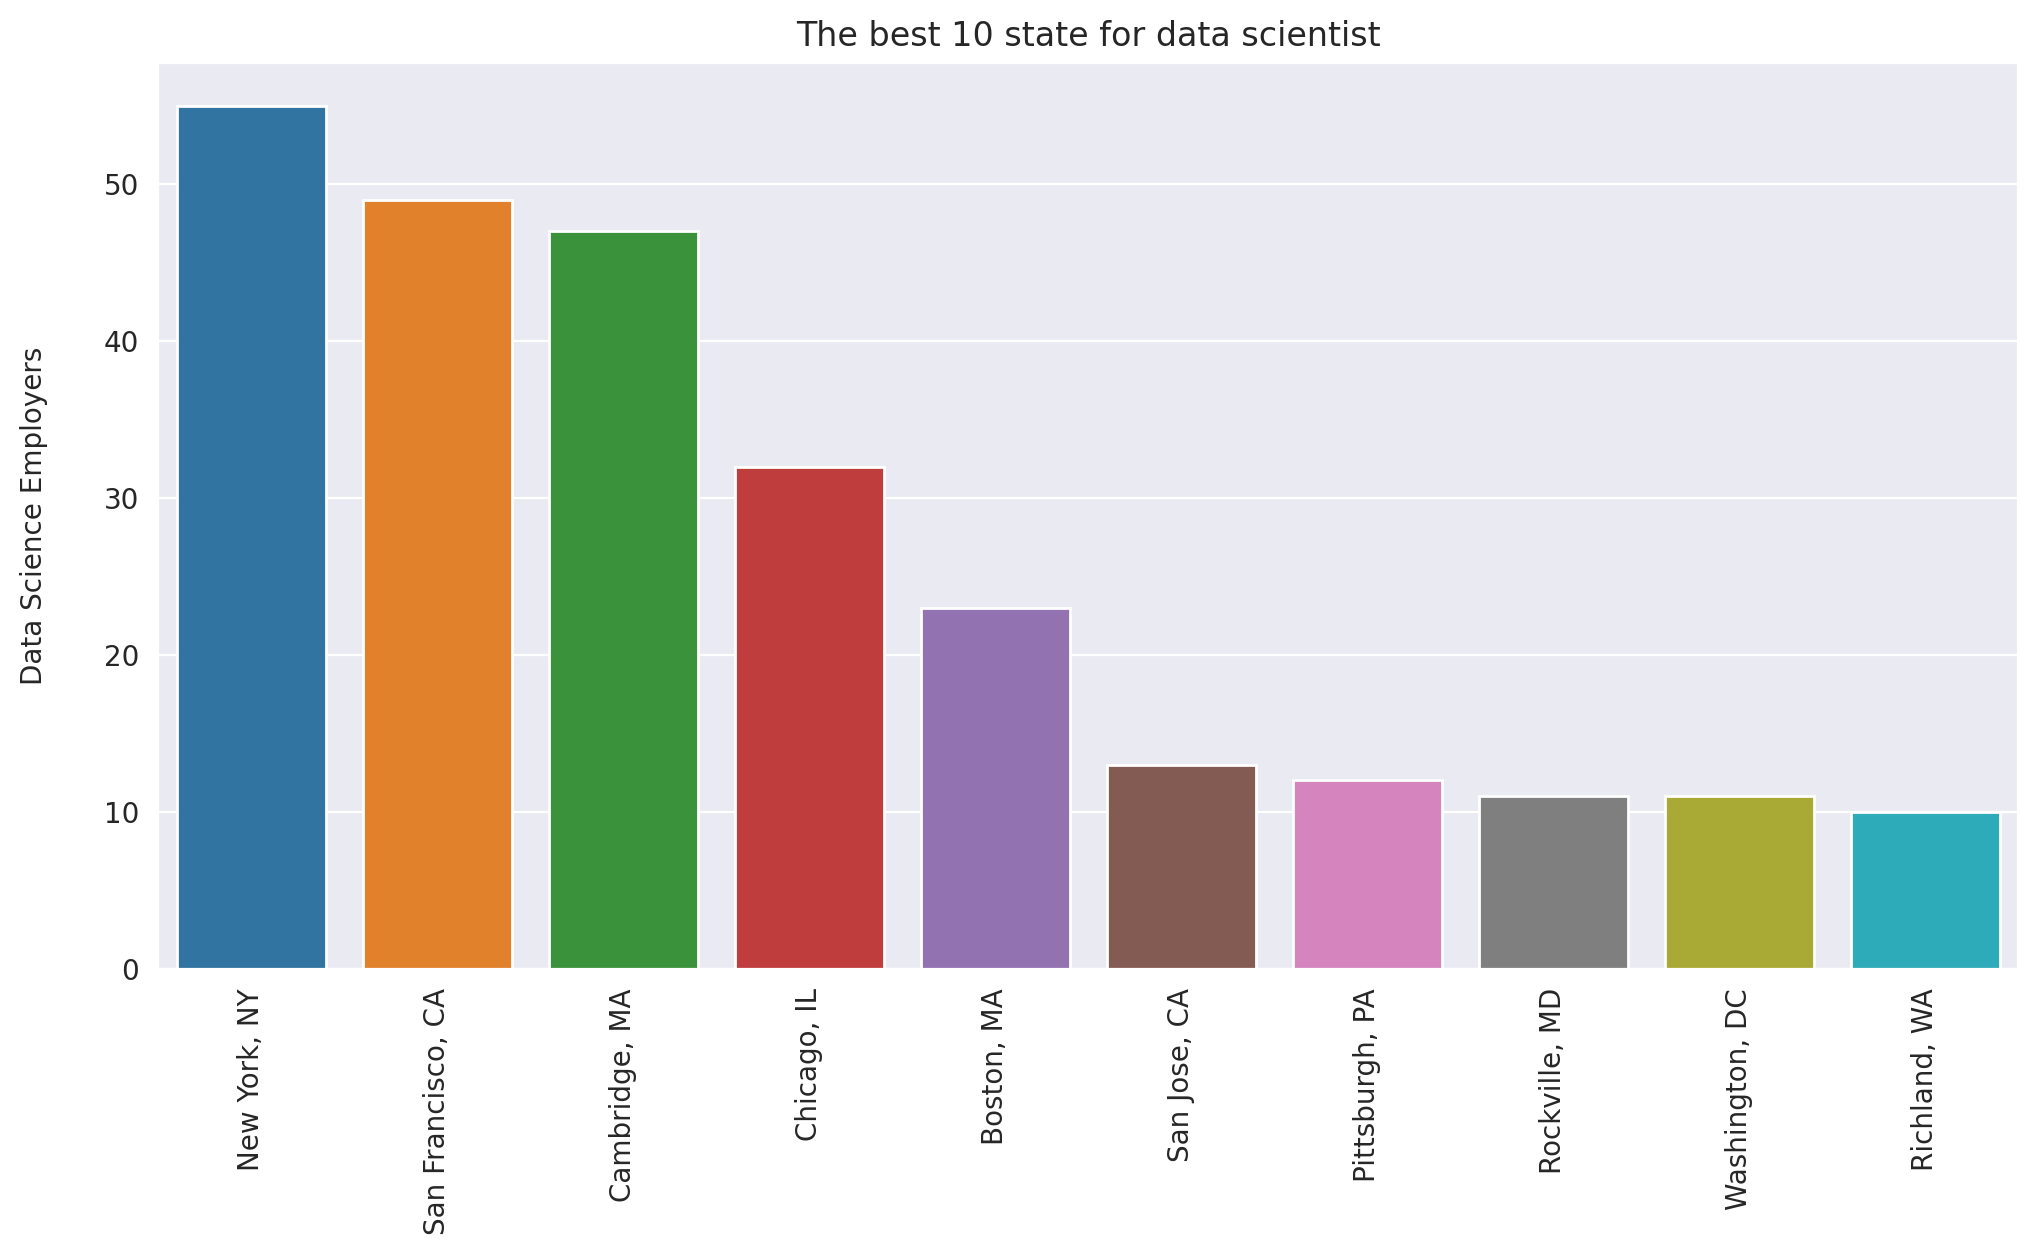

In [13]:
best_stats = df['Location'].value_counts()[:10]
stats = list(best_stats.index)
stats_values = list(best_stats)
#plt.figure(figsize=(10,10), dpi=200)
#plt.pie(stats_values, labels=stats, autopct='%1.1f%%')
#plt.show()

plt.figure(figsize=(12,6), dpi=200)
plt.xticks(rotation=90)
plt.ylabel('Data Science Employers', labelpad=20)
plt.title('The best 10 state for data scientist')
sns.barplot(stats, stats_values)
plt.show()

### 3) skills

In [14]:
dshs = df.loc[data['Avg Salary(K)'] > 150]
dshs.head()

,job_title_sim,Job Title,Location,Lower Salary,Upper Salary,Avg Salary(K),Python,spark,aws,excel,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
10,data scientist,Data Scientist,"San Jose, CA",126,201,163.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,data scientist,Customer Data Scientist,"Mountain View, CA",118,189,153.5,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
45,data scientist,Data Scientist,"Washington, DC",150,160,155.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
46,data scientist,Lead Data Scientist,"Bellevue, WA",158,211,184.5,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
56,data scientist,Data Scientist,"San Francisco, CA",120,189,154.5,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [15]:
dshs_skills = dshs.iloc[:,6:]
dshs_skills.head()

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
45,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
46,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0
56,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
dshs_skills['Python'].value_counts()

1    55
0    23
Name: Python, dtype: int64

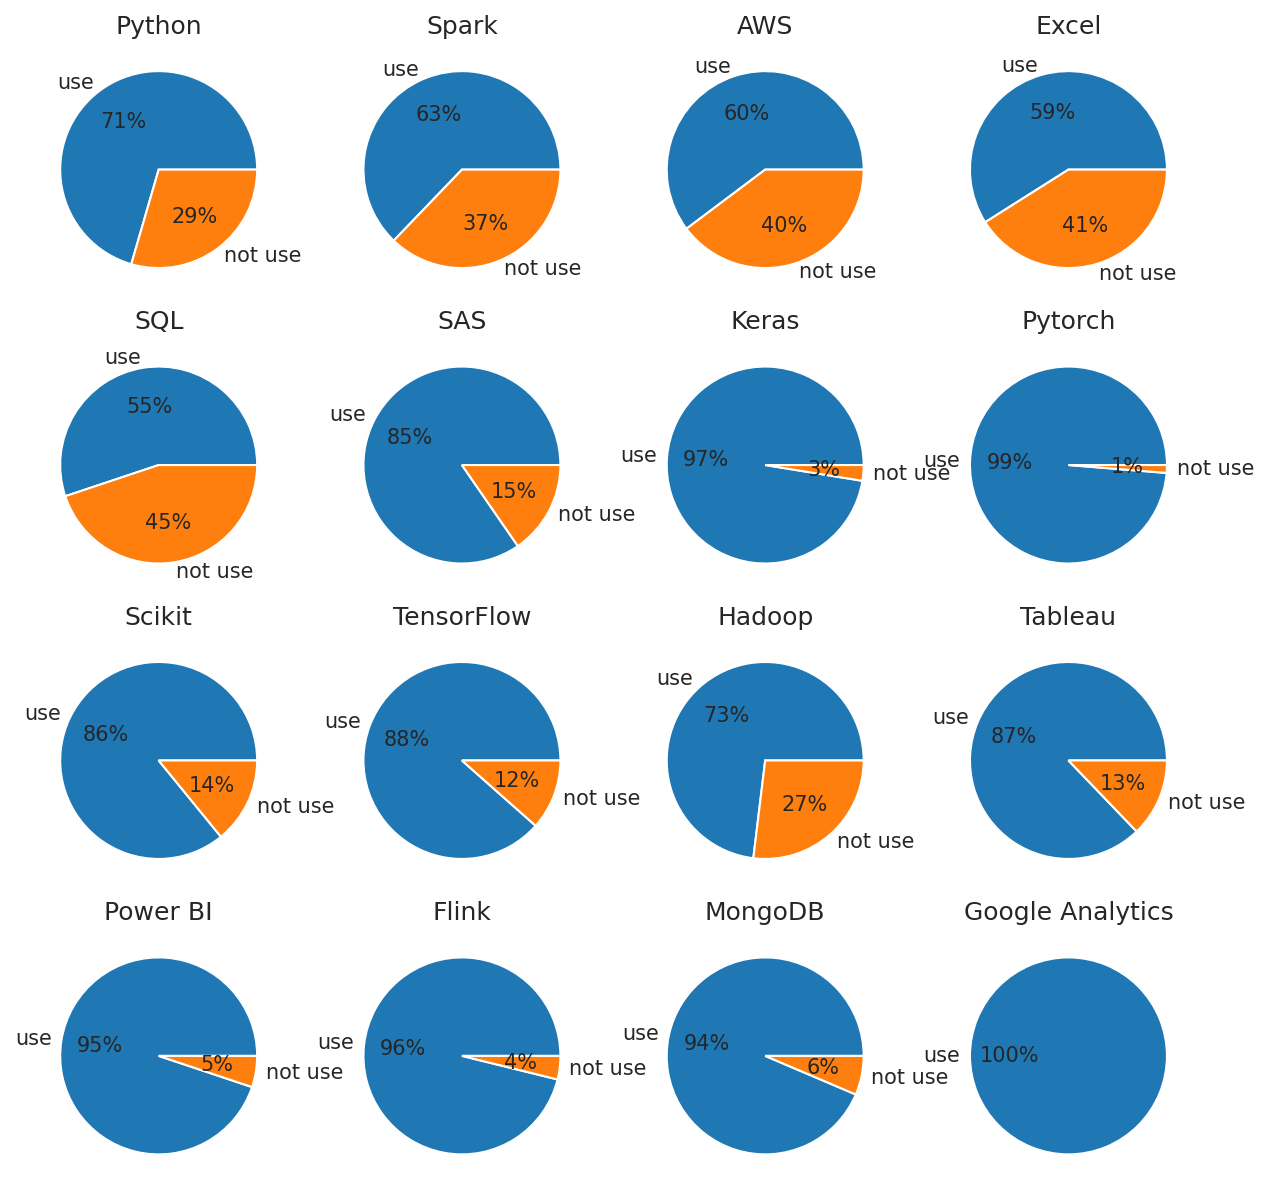

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(10,10), dpi=150)
axs[0, 0].pie(list(dshs_skills['Python'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[0, 0].set_title('Python')
axs[0, 1].pie(list(dshs_skills['spark'].value_counts()) , labels=['use', 'not use'] , autopct='%1.0f%%')
axs[0, 1].set_title('Spark')
axs[0, 2].pie(list(dshs_skills['aws'].value_counts()) , labels=['use', 'not use'], autopct='%1.0f%%')
axs[0, 2].set_title('AWS')
axs[0, 3].pie(list(dshs_skills['excel'].value_counts()) , labels=['use', 'not use'], autopct='%1.0f%%')
axs[0, 3].set_title('Excel')
axs[1, 0].pie(list(dshs_skills['sql'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[1, 0].set_title('SQL')
axs[1, 1].pie(list(dshs_skills['sas'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[1, 1].set_title('SAS')
axs[1, 2].pie(list(dshs_skills['keras'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[1, 2].set_title('Keras')
axs[1, 3].pie(list(dshs_skills['pytorch'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[1, 3].set_title('Pytorch')
axs[2, 0].pie(list(dshs_skills['scikit'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[2, 0].set_title('Scikit')
axs[2, 1].pie(list(dshs_skills['tensor'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[2, 1].set_title('TensorFlow')
axs[2, 2].pie(list(dshs_skills['hadoop'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[2, 2].set_title('Hadoop')
axs[2, 3].pie(list(dshs_skills['tableau'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[2, 3].set_title('Tableau')
axs[3, 0].pie(list(dshs_skills['bi'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[3, 0].set_title('Power BI')
axs[3, 1].pie(list(dshs_skills['flink'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[3, 1].set_title('Flink')
axs[3, 2].pie(list(dshs_skills['mongo'].value_counts()), labels=['use', 'not use'], autopct='%1.0f%%')
axs[3, 2].set_title('MongoDB')
axs[3, 3].pie(list(dshs_skills['google_an'].value_counts()), labels=['use'], autopct='%1.0f%%')
axs[3, 3].set_title('Google Analytics')
plt.show()